Train the Dataset with VGG 16 model

Found 475 images belonging to 3 classes.
Found 475 images belonging to 3 classes.
Found 475 images belonging to 3 classes.
Epoch 1/40
7/7 [==============================] - 109s 17s/step - loss: 1.1285 - accuracy: 0.3285 - val_loss: 1.0698 - val_accuracy: 0.3616
Epoch 2/40
7/7 [==============================] - 109s 17s/step - loss: 1.0674 - accuracy: 0.3966 - val_loss: 1.0547 - val_accuracy: 0.5089
Epoch 3/40
7/7 [==============================] - 115s 18s/step - loss: 1.0424 - accuracy: 0.5603 - val_loss: 1.0251 - val_accuracy: 0.5714
Epoch 4/40
7/7 [==============================] - 110s 17s/step - loss: 1.0182 - accuracy: 0.6788 - val_loss: 0.9960 - val_accuracy: 0.6897
Epoch 5/40
7/7 [==============================] - 110s 17s/step - loss: 1.0012 - accuracy: 0.5596 - val_loss: 0.9809 - val_accuracy: 0.5000
Epoch 6/40
7/7 [==============================] - 109s 17s/step - loss: 0.9778 - accuracy: 0.6058 - val_loss: 0.9556 - val_accuracy: 0.7210
Epoch 7/40
7/7 [=====================

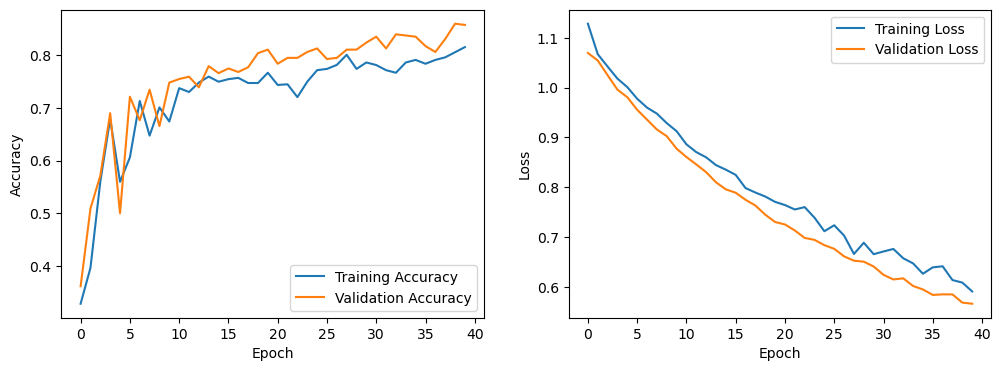

7/7 [==============================] - 59s 8s/step - loss: 0.6040 - accuracy: 0.7902
Test loss: 0.5715
Test accuracy: 85.04
Train loss: 0.6040
Train accuracy: 79.02


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define your data directories
train_dir = 'Dataset/'
val_dir = 'Validation/'
test_dir = 'test/'

# Define image size and batch size
img_size = (224, 224)
batch_size = 64

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=40,  # Adjust the number of epochs as needed
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)
print(f'Test loss: {test_loss:.4f}')
test_accuracy=test_accuracy* 100
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Train loss: {train_loss:.4f}')
train_accuracy=train_accuracy* 100
print(f'Train accuracy: {train_accuracy:.2f}')

# Save the model for future use
model.save('bitter_gourd_classificationVGG16(4).h5')


In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tkinter as tk
from tkinter import filedialog

# Load the trained model
model = load_model('bitter_gourd_classificationVGG16(2).h5')  # Change the path if necessary

# Define a function to predict the label of a single image
def predict_label(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image

    prediction = model.predict(img)
    class_indices = {0: 'Small', 1: 'Medium', 2: 'Ripe'}
    predicted_class = class_indices[np.argmax(prediction)]

    return predicted_class

# Example usage:
#image_path = 'small2.png' 
#img = mpimg.imread(img_path)
root = tk.Tk()
root.withdraw()  # Hide the main window

# Ask the user to select a file
image_path = filedialog.askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg *.jpeg *.png")])

# Check if a file was selected
if image_path:
    # Load and display the selected image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("No file selected.")

# Close the GUI window

predicted_label = predict_label(image_path)
print(f'Predicted Label: {predicted_label}')


No file selected.


FileNotFoundError: [Errno 2] No such file or directory: ''

Classify the bitter gourd image